# Unification of Knowledge: Creation of new input

Concatenating the predictors with the responses of the LLM generated using various prompts from the refinement process (e.g., Resp_aware_in = preds + "YES" + "NO" + "YES"). These new inputs were then passed through a ML model for classification.


In [12]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [13]:
data_change = pd.read_csv("../../dat/dips/DIPS_Data_cleaned_change.csv", sep =",", low_memory = False)

In [14]:
data_change

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,ses_kom,whi_change,soz_change,gke_change,lzh_change,asi_change,bsq_change,das_change,scl_change,hpi
0,1.905045,-1.858903,-0.994979,-1.928212,2.441714,0.062486,-0.359417,1.612646,0.764021,0.566822,...,0,-2.301869,2.753129,2.029671,1.900449,-2.518013,-1.431081,-2.600931,-2.639135,0.0
1,0.455324,-0.434443,-0.088340,0.660932,0.041981,0.413949,-1.169769,0.423639,-0.382329,0.941935,...,1,-0.752017,0.204409,0.647389,-0.211204,-0.585676,-0.262880,0.105940,-0.073737,0.0
2,3.838008,-0.701529,-0.315000,-1.280926,0.041981,-0.113246,1.261288,0.291528,-0.286800,0.441785,...,0,-0.752017,0.315223,0.094477,0.316709,1.070613,-0.262880,-0.164747,1.783966,0.0
3,-0.511158,0.990016,0.138320,0.175467,-0.957908,-1.079771,-0.521487,-0.369032,0.477433,0.024994,...,1,-0.235399,-0.017219,0.647389,0.492680,-0.723700,-1.041680,-0.489571,0.147418,0.0
4,-0.027917,-1.947932,0.591639,-1.280926,-0.357975,-0.640441,-0.440452,-1.690150,-1.337621,1.525442,...,0,-0.235399,3.639640,0.923846,2.476355,0.518517,0.321221,-3.034031,-0.162199,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,-0.511158,0.277787,-1.221639,-0.148176,-1.157886,-1.343368,-0.359417,0.555751,-0.018124,0.275069,...,0,0.281218,-0.460475,0.370933,0.844622,-0.723700,0.826225,-1.355770,0.893382,0.0
1225,-0.511158,-0.790558,-0.541660,0.822753,-0.757930,-0.376844,-0.278381,1.084199,0.477433,1.066972,...,0,0.281218,0.758478,-1.011349,-1.794945,0.242469,-0.068179,-1.518183,-0.692971,0.0
1226,-0.511158,-0.523472,-0.315000,0.013646,0.241958,0.238217,0.288865,-1.293815,-1.242092,-0.308439,...,0,0.281218,-0.349661,0.370933,1.372536,1.346661,0.710621,-0.814396,0.191649,0.0
1227,-0.027917,-1.680845,0.364979,-0.471819,0.241958,-0.376844,0.369900,0.159416,0.286375,0.691860,...,0,-0.752017,-0.128033,-0.734893,0.492680,-0.171604,-0.262880,-0.110610,-1.975670,0.0


In [16]:
y_pred_lr = pd.read_csv("../01_ML/y_pred_ML/y_pred_lr.csv", sep = ",")
y_pred_rf = pd.read_csv("../01_ML/y_pred_ML/y_pred_rf.csv", sep = ",")
y_pred_svc = pd.read_csv("../01_ML/y_pred_ML/y_pred_svc.csv", sep = ",")
y_pred_dnn = pd.read_csv("../01_ML/y_pred_ML/y_pred_dnn.csv", sep = ",")
y_pred_knn = pd.read_csv("../01_ML/y_pred_ML/y_pred_knn.csv", sep = ",")
y_pred_nb = pd.read_csv("../01_ML/y_pred_ML/y_pred_nb.csv", sep = ",")
y_pred_xgb = pd.read_csv("../01_ML/y_pred_ML/y_pred_xgb.csv", sep = ",")

In [17]:
y_pred_GPT_simple_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_simple_prompt.csv", sep =",")
y_pred_GPT_class_def_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_class_definitions_prompt.csv", sep =",")
y_pred_GPT_profiled_simple_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_few_shot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_few_shot_prompt.csv", sep =",")
y_pred_GPT_vignette_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_vignette_prompt.csv", sep =",")
y_pred_GPT_cot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_cot_prompt.csv", sep =",")

In [18]:
y_pred_GPT_o3_simple_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_simple_prompt.csv", sep =",")
y_pred_GPT_o3_class_definitions_prompt = pd.read_csv(
    "../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_class_definitions_prompt.csv", sep =",")
y_pred_GPT_o3_profiled_simple_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_o3_few_shot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_few_shot_prompt.csv", sep =",")
y_pred_GPT_o3_vignette_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_vignette_prompt.csv", sep =",")
y_pred_GPT_o3_cot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_cot_prompt.csv", sep =",")

In [19]:
y_pred_Gemini_simple_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_simple_prompt.csv", sep =",")
y_pred_Gemini_class_def_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_class_definitions_prompt.csv", sep =",")
y_pred_Gemini_profiled_simple_prompt = pd.read_csv(
    "../02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_profiled_simple_prompt.csv", sep =",")
y_pred_Gemini_few_shot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt.csv", sep =",")
y_pred_Gemini_vignette_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_vignette_prompt.csv", sep =",")
y_pred_Gemini_cot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_cot_prompt.csv", sep =",")

In [20]:
y_pred_Gemma_simple_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_simple_prompt.csv", sep =",")
y_pred_Gemma_class_def_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_class_definitions_prompt.csv", sep =",")
y_pred_Gemma_profiled_simple_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_profiled_simple_prompt.csv", sep =",")
y_pred_Gemma_few_shot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_few_shot_prompt.csv", sep =",")
y_pred_Gemma_vignette_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_vignette_prompt.csv", sep =",")
y_pred_Gemma_cot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_cot_prompt.csv", sep =",")

In [21]:
y_pred_Claude_4_simple_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Claude/y_pred_claude_4_simple_prompt.csv", sep =",")
y_pred_Claude_4_class_def_prompt = pd.read_csv(
    "../02_LLM/y_pred_LLMs/Claude/y_pred_claude_4_class_definitions_prompt.csv", sep =",")
y_pred_Claude_4_profiled_simple_prompt = pd.read_csv(
    "../02_LLM/y_pred_LLMs/Claude/y_pred_claude_profiled_simple_prompt.csv", sep =",")
y_pred_Claude_4_few_shot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Claude/y_pred_claude_few_shot_prompt.csv", sep =",")
y_pred_Claude_4_vignette_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Claude/y_pred_claude_vignette_prompt.csv", sep =",")
y_pred_Claude_4_cot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Claude/y_pred_claude_cot_prompt.csv", sep =",")

In [22]:
y_pred_DeepSeek_simple_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_simple_prompt.csv", sep =",")
y_pred_DeepSeek_class_def_prompt = pd.read_csv(
    "../02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_class_definitions_prompt.csv", sep =",")
y_pred_DeepSeek_profiled_simple_prompt = pd.read_csv(
    "../02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_profiled_simple_prompt.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt.csv", sep =",")
y_pred_DeepSeek_vignette_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_vignette_prompt.csv", sep =",")
y_pred_DeepSeek_cot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_cot_prompt.csv", sep =",")

In [23]:
y_pred_Grok_simple_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Grok/y_pred_Grok_simple_prompt.csv", sep =",")
y_pred_Grok_class_def_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Grok/y_pred_Grok_class_definitions_prompt.csv", sep =",")
y_pred_Grok_profiled_simple_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Grok/y_pred_Grok_profiled_simple_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt.csv", sep =",")
y_pred_Grok_vignette_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Grok/y_pred_Grok_vignette_prompt.csv", sep =",")
y_pred_Grok_cot_prompt = pd.read_csv("../02_LLM/y_pred_LLMs/Grok/y_pred_Grok_cot_prompt.csv", sep =",")

## 1 DNN Model

In [24]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("DNN \n",
      "X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

DNN 
 X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [25]:
X_test = X_test.reset_index(drop = True)

In [13]:
# Concatenate the predictors with the responses of the LLM generated using various prompts
X_test_new_input = pd.concat([
    X_test,
    y_pred_GPT_simple_prompt["y_pred"],
    y_pred_GPT_class_def_prompt["y_pred"],
    y_pred_GPT_profiled_simple_prompt["y_pred"],
    y_pred_GPT_few_shot_prompt["y_pred"],
    y_pred_GPT_vignette_prompt["y_pred"],
    y_pred_GPT_cot_prompt["y_pred"],
    y_pred_GPT_o3_simple_prompt["y_pred"],
    y_pred_GPT_o3_class_definitions_prompt["y_pred"],
    y_pred_GPT_o3_profiled_simple_prompt["y_pred"],
    y_pred_GPT_o3_few_shot_prompt["y_pred"],
    y_pred_GPT_o3_vignette_prompt["y_pred"],
    y_pred_GPT_o3_cot_prompt["y_pred"],
    y_pred_Gemini_simple_prompt["y_pred"],
    y_pred_Gemini_class_def_prompt["y_pred"],
    y_pred_Gemini_profiled_simple_prompt["y_pred"],
    y_pred_Gemini_few_shot_prompt["y_pred"],
    y_pred_Gemini_vignette_prompt["y_pred"],
    y_pred_Gemini_cot_prompt["y_pred"],
    y_pred_Gemma_simple_prompt["y_pred"],
    y_pred_Gemma_class_def_prompt["y_pred"],
    y_pred_Gemma_profiled_simple_prompt["y_pred"],
    y_pred_Gemma_few_shot_prompt["y_pred"],
    y_pred_Gemma_vignette_prompt["y_pred"],
    y_pred_Gemma_cot_prompt["y_pred"],
    y_pred_Claude_4_simple_prompt["y_pred"],
    y_pred_Claude_4_class_def_prompt["y_pred"],
    y_pred_Claude_4_profiled_simple_prompt["y_pred"],
    y_pred_Claude_4_few_shot_prompt["y_pred"],
    y_pred_Claude_4_vignette_prompt["y_pred"],
    y_pred_Claude_4_cot_prompt["y_pred"],
    y_pred_DeepSeek_simple_prompt["y_pred"],
    y_pred_DeepSeek_class_def_prompt["y_pred"],
    y_pred_DeepSeek_profiled_simple_prompt["y_pred"],
    y_pred_DeepSeek_few_shot_prompt["y_pred"],
    y_pred_DeepSeek_vignette_prompt["y_pred"],
    y_pred_DeepSeek_cot_prompt["y_pred"],
    y_pred_Grok_simple_prompt["y_pred"],
    y_pred_Grok_class_def_prompt["y_pred"],
    y_pred_Grok_profiled_simple_prompt["y_pred"],
    y_pred_Grok_few_shot_prompt["y_pred"],
    y_pred_Grok_vignette_prompt["y_pred"],
    y_pred_Grok_cot_prompt["y_pred"]
], axis = 1)


In [14]:
X_test_new_input

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred
0,-0.027917,0.142124,0.364979,0.337289,0.441936,1.731937,0.207830,0.159416,0.286375,0.275069,...,0,0,0,0.0,0,0,0,1,0,0.0
1,-0.027917,1.079045,-2.354937,-0.471819,0.041981,0.853278,-0.845628,0.555751,1.241667,-0.225081,...,1,1,0,0.0,1,1,1,1,1,0.0
2,-0.994398,0.811959,2.404917,0.984575,-0.957908,2.698461,-0.764593,-0.369032,0.286375,-1.308738,...,0,0,0,0.0,0,0,0,0,0,0.0
3,-0.027917,0.900988,0.364979,1.631861,-0.957908,0.150351,-0.278381,-1.161703,-1.242092,-1.100342,...,1,0,1,1.0,1,1,1,1,1,1.0
4,-0.511158,0.811959,0.591639,1.470039,-0.957908,-0.288978,-0.602522,-1.029591,-0.764446,-1.016984,...,0,0,0,0.0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.511158,0.722930,0.818299,0.660932,0.841892,-0.376844,-0.926663,-0.236920,-0.382329,-1.683850,...,0,1,1,1.0,1,1,1,1,1,1.0
242,-0.511158,-0.167357,0.364979,0.337289,-1.157886,-1.343368,-0.440452,-0.104808,-0.286800,0.900255,...,0,0,0,0.0,1,0,0,0,0,0.0
243,0.455324,0.277787,-0.541660,-0.309997,-0.957908,1.995534,2.476817,0.687863,-0.955504,-0.641872,...,0,0,1,0.0,1,1,1,0,1,1.0
244,-0.994398,-0.434443,0.138320,0.822753,0.041981,-1.255502,-0.035276,0.555751,-0.095742,1.650480,...,0,0,0,0.0,0,0,0,1,0,0.0


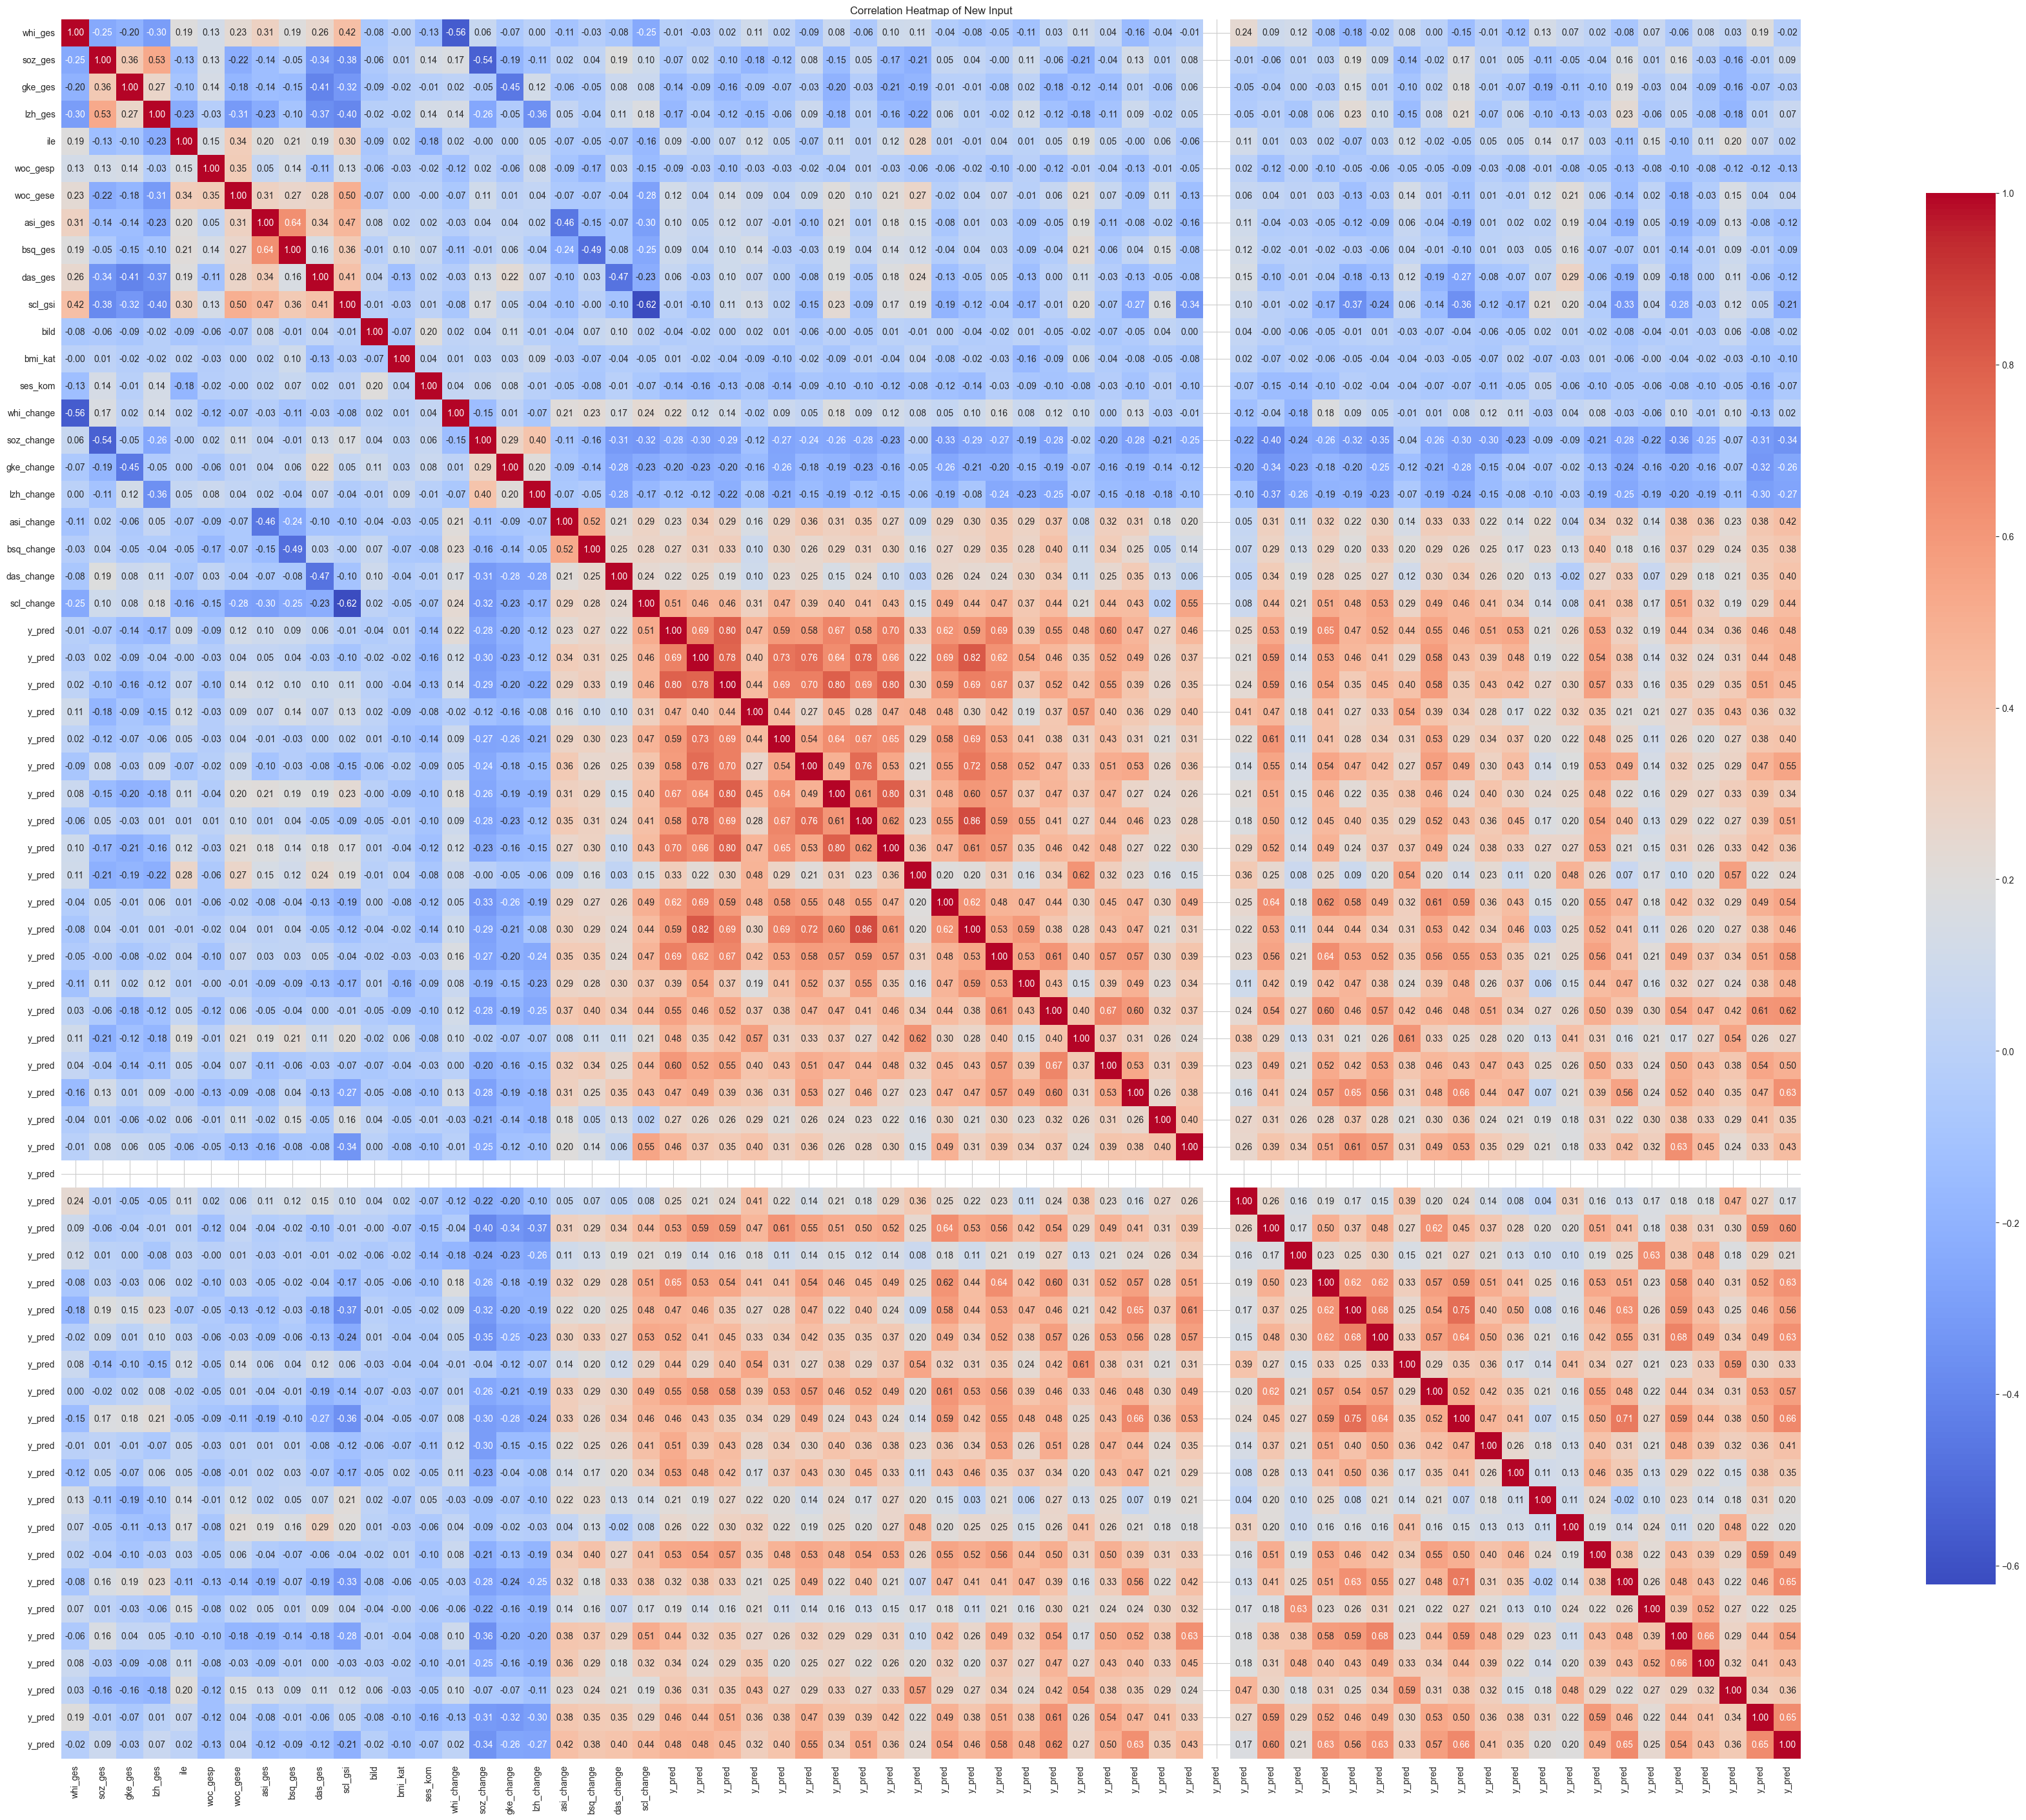

In [15]:
# heatmap of the new input
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (50, 35))
sns.heatmap(X_test_new_input.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of New Input")
plt.show()

In [16]:
# again train-test split of X_test_new_input and y_test
X_train_dnn, X_test_dnn, y_train_dnn, y_test_dnn = train_test_split(
    X_test_new_input, y_test, test_size = 0.2, random_state = 42, stratify = y_test
)

print("DNN New Input \n",
      "X_train shape: ", X_train_dnn.shape, round(X_train_dnn.shape[0]/len(X_test_new_input), 2), "\n",
      "X_test shape: ", X_test_dnn.shape, round(X_test_dnn.shape[0]/len(X_test_new_input), 2),  "\n",
      "y_train shape: ", y_train_dnn.shape, round(y_train_dnn.shape[0]/len(y_test), 2), "\n",
      "y_test shape: ", y_test_dnn.shape, round(y_test_dnn.shape[0]/len(y_test), 2), "\n")

DNN New Input 
 X_train shape:  (196, 64) 0.8 
 X_test shape:  (50, 64) 0.2 
 y_train shape:  (196,) 0.8 
 y_test shape:  (50,) 0.2 



In [55]:
def sklearn_dnn(x_test_dnn, x_train_dnn, y_train_dnn, y_test_dnn):

    # 1: GRID SEARCH
    dnn_model = MLPClassifier(random_state = 42)

    param_grid = {
        # 'hidden_layer_sizes': [(50, ), (100, ), (50, 50), (10, 30, 10), (50, 50, 50)],
        'hidden_layer_sizes': [(50, ), (100, ), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [100, 500, 1000]
    }

    grid_search = GridSearchCV(
        estimator = dnn_model,
        param_grid = param_grid,
        cv = 10
    )
    grid_search.fit(x_train_dnn, y_train_dnn)
    best_model = grid_search.best_estimator_
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)

    # 2: FITTING THE MODEL
    model = MLPClassifier(
        hidden_layer_sizes = best_model.hidden_layer_sizes,
        activation = best_model.activation,
        solver = best_model.solver,
        alpha = best_model.alpha,
        learning_rate = best_model.learning_rate,
        max_iter = best_model.max_iter,
        random_state = 42
    )
    model.fit(x_train_dnn, y_train_dnn)

    # 3: ESTIMATING WEIGHTS
    weights_d = model.coefs_
    features_d = model.feature_names_in_

    # 4: COMPUTE TEST SET PREDICTIONS
    y_pred_d = model.predict(x_test_dnn)
    y_pred_proba_d = model.predict_proba(x_test_dnn)

    # 5: COMPUTE METRICS
    accuracy_dnn = model.score(x_test_dnn, y_test_dnn)
    macro_f1_dnn = recall_score(y_test_dnn, y_pred_d, average = "macro")
    micro_f1_dnn = recall_score(y_test_dnn, y_pred_d, average = "micro")
    mcc_dnn = matthews_corrcoef(y_test_dnn, y_pred_d)

    cm_dnn = confusion_matrix(y_test_dnn, y_pred_d)
    precision_dnn = cm_dnn[1, 1] / (cm_dnn[1, 1] + cm_dnn[0, 1])
    recall_dnn = cm_dnn[1, 1] / (cm_dnn[1, 1] + cm_dnn[1, 0])

    # store metrics in a dictionary
    metrics_d = {
        "accuracy": accuracy_dnn,
        "macro_f1": macro_f1_dnn,
        "micro_f1": micro_f1_dnn,
        "mcc": mcc_dnn,
        "precision": precision_dnn,
        "recall": recall_dnn,
        "confusion_matrix": cm_dnn
    }

    return weights_d, features_d, y_pred_d, y_pred_proba_d, metrics_d

In [18]:
start = time.time()

weights_dnn, features_dnn, y_pred_dnn, y_pred_proba_dnn, metrics_dnn = sklearn_dnn(X_test_dnn, X_train_dnn, y_train_dnn, y_test_dnn)

end = time.time()
print("Execution time: ", {end - start}, "seconds")
time_dnn = end - start
time_dnn_df = pd.DataFrame({"time": [time_dnn]})
time_dnn_df.to_csv("exp/y_pred_unification/new_input/time_new_input_dnn_2.csv", sep = ",", index = False)

# # save weights_ML and y_pred_ML
# first_layer_weights = weights_dnn[0]
# importance_scores = np.mean(np.abs(first_layer_weights), axis=1)
# weights_dnn_df = pd.DataFrame([importance_scores], columns = features_dnn)
# weights_dnn_df.to_csv("y_pred_unification/new_input/weights_dnn.csv", sep = ",", index = False)

y_pred_dnn = pd.DataFrame(y_pred_dnn, columns = ["y_pred"])
y_pred_dnn.to_csv("y_pred_unification/new_input/y_pred_new_input_dnn_2.csv", sep = ",", index = False)

Best parameters:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'sgd'}
Best score:  0.7394736842105263
Execution time:  {1203.413910150528} seconds


In [19]:
metrics_dnn

{'accuracy': 0.7,
 'macro_f1': 0.5297619047619048,
 'micro_f1': 0.7,
 'mcc': np.float64(0.08908708063747481),
 'precision': np.float64(0.4),
 'recall': np.float64(0.14285714285714285),
 'confusion_matrix': array([[33,  3],
        [12,  2]])}

In [49]:
def sklearn_support_vector_classification(x_test_svc, x_train_svc, y_train_svc, y_test_svc):

    # 1: GRID SEARCH
    svc_model = SVC(random_state = 42)

    param_grid = {
        'C': np.logspace(-4, 4, 10),
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'degree': [2, 3, 4, 5],
        'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
        # 'max_iter': [100, 500, 1000, 2500, 5000],
        'max_iter': [100, 500, 1000],
        'tol': [1e-4, 1e-3, 1e-2, 1e-1]
    }

    grid_search = GridSearchCV(
        estimator = svc_model,
        param_grid = param_grid,
        cv = 10
    )
    grid_search.fit(x_train_svc, y_train_svc)
    best_model = grid_search.best_estimator_
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)

    # 2: FITTING THE MODEL
    model = SVC(
        C = best_model.C,
        kernel = best_model.kernel,
        degree = best_model.degree,
        gamma = best_model.gamma,
        max_iter = best_model.max_iter,
        tol = best_model.tol,
        random_state = 42
    )
    model.fit(x_train_svc, y_train_svc)

    # 3: ESTIMATING WEIGHTS
    # if model.kernel == "linear":
    #     weights_s = model.coef_
    #     features_s = model.feature_names_in_
    # else:
    #     weights_s = model.dual_coef_
    #
    #     # get importance of features
    #     result = permutation_importance(model, x_train_svc, y_train_svc, n_repeats = 30, random_state = 42)
    #     sorted_idx = result.importances_mean.argsort()[::-1]
    #     weights_s = result.importances_mean[sorted_idx]
    #     # get feature names
    #     features_s = x_train_svc.columns[sorted_idx]

    # 4: COMPUTE TEST SET PREDICTIONS
    y_pred_s = model.predict(x_test_svc)

    # 5: COMPUTE METRICS
    accuracy_svc = model.score(x_test_svc, y_test_svc)
    macro_f1_svc = recall_score(y_test_svc, y_pred_s, average = "macro")
    micro_f1_svc = recall_score(y_test_svc, y_pred_s, average = "micro")
    mcc_svc = matthews_corrcoef(y_test_svc, y_pred_s)

    cm_svc = confusion_matrix(y_test_svc, y_pred_s)
    precision_svc = cm_svc[1][1] / (cm_svc[1][1] + cm_svc[0][1])
    recall_svc = cm_svc[1][1] / (cm_svc[1][1] + cm_svc[1][0])

    # store metrics in a dictionary
    metrics_s = {
        "accuracy": round(accuracy_svc, 4),
        "macro_f1": round(macro_f1_svc, 4),
        "micro_f1": round(micro_f1_svc, 4),
        "mcc": round(mcc_svc, 4),
        "precision": round(precision_svc, 4),
        "recall": round(recall_svc, 4),
        "confusion_matrix": cm_svc
    }

    return y_pred_s, metrics_s

In [23]:
start = time.time()

y_pred_svc, metrics_svc = sklearn_support_vector_classification(X_test_dnn, X_train_dnn, y_train_dnn, y_test_dnn)

end = time.time()
print("Execution time: ", {end - start}, "seconds")
time_svc = end - start
time_svc_df = pd.DataFrame({"time": [time_svc]})
time_svc_df.to_csv("y_pred_unification/new_input/time_new_input_svc.csv", sep = ",", index = False)

# save y_pred_ML
y_pred_svc = pd.DataFrame(y_pred_svc, columns = ["y_pred"])
y_pred_svc.to_csv("y_pred_unification/new_input/y_pred_new_input_svc.csv", sep = ",", index = False)

Best parameters:  {'C': np.float64(2.782559402207126), 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid', 'max_iter': 100, 'tol': 0.0001}
Best score:  0.7452631578947367
Execution time:  {1524.1490111351013} seconds


In [24]:
metrics_svc

{'accuracy': 0.72,
 'macro_f1': 0.5655,
 'micro_f1': 0.72,
 'mcc': np.float64(0.1809),
 'precision': np.float64(0.5),
 'recall': np.float64(0.2143),
 'confusion_matrix': array([[33,  3],
        [11,  3]])}

In [38]:
X_train_GPT_4_simple_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_simple_prompt.csv", sep = ",")
X_train_GPT_4_class_def_prompt = pd.read_csv(
    "New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_class_definitions_prompt.csv", sep = ",")
X_train_GPT_4_profiled_simple_prompt = pd.read_csv(
    "New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_profiled_simple_prompt.csv", sep = ",")
X_train_GPT_4_few_shot_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_few_shot_prompt.csv", sep = ",")
X_train_GPT_4_vignette_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_vignette_prompt.csv", sep = ",")
X_train_GPT_4_cot_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/GPT/X_train_GPT_4_cot_prompt.csv", sep = ",")

In [51]:
X_train_GPT_o3_simple_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_simple_prompt.csv", sep = ",")
X_train_GPT_o3_class_def_prompt = pd.read_csv(
    "New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_class_definitions_prompt.csv", sep = ",")
X_train_GPT_o3_profiled_simple_prompt = pd.read_csv(
    "New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_profiled_simple_prompt.csv", sep = ",")
X_train_GPT_o3_few_shot_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_few_shot_prompt.csv", sep = ",")
X_train_GPT_o3_vignette_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_vignette_prompt.csv", sep = ",")
X_train_GPT_o3_cot_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_cot_prompt.csv", sep = ",")

In [52]:
X_train_GPT_o3_cot_prompt

,Unnamed: 0,y_pred
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
978,978,0
979,979,0
980,980,0
981,981,0


In [47]:
# X_train_GPT_o3_cot_prompt_1 = pd.read_csv("New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_cot_prompt.csv", sep = ",")
# X_train_GPT_o3_cot_prompt_2 = pd.read_csv("New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_cot_prompt_2.csv", sep = ",")


In [50]:
# X_train_GPT_o3_cot_prompt = pd.concat([X_train_GPT_o3_cot_prompt_1, X_train_GPT_o3_cot_prompt_2], ignore_index=True)
# X_train_GPT_o3_cot_prompt.to_csv("New_Input_Prompting/X_train_pred/GPT/X_train_GPT_o3_cot_prompt.csv", sep = ",")

In [53]:
X_train_grok_simple_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/Grok/X_train_grok_simple_prompt.csv", sep = ",")
X_train_grok_class_def_prompt = pd.read_csv(
    "New_Input_Prompting/X_train_pred/Grok/X_train_grok_class_definitions_prompt.csv", sep = ",")
X_train_grok_profiled_simple_prompt = pd.read_csv(
    "New_Input_Prompting/X_train_pred/Grok/X_train_grok_profiled_simple_prompt.csv", sep = ",")
X_train_grok_few_shot_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/Grok/X_train_grok_few_shot_prompt.csv", sep = ",")
X_train_grok_vignette_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/Grok/X_train_grok_vignette_prompt.csv", sep = ",")
X_train_grok_cot_prompt = pd.read_csv("New_Input_Prompting/X_train_pred/Grok/X_train_grok_cot_prompt.csv", sep = ",")

In [54]:
# print all lenghts of X_train dfs
print(len(X_train_GPT_4_simple_prompt), len(X_train_GPT_4_class_def_prompt), len(X_train_GPT_4_profiled_simple_prompt), len(X_train_GPT_4_few_shot_prompt), len(X_train_GPT_4_vignette_prompt), len(X_train_GPT_4_cot_prompt))

print(len(X_train_GPT_o3_simple_prompt), len(X_train_GPT_o3_class_def_prompt), len(X_train_GPT_o3_profiled_simple_prompt), len(X_train_GPT_o3_few_shot_prompt), len(X_train_GPT_o3_vignette_prompt), len(X_train_GPT_o3_cot_prompt))


print(len(X_train_grok_simple_prompt), len(X_train_grok_class_def_prompt), len(X_train_grok_profiled_simple_prompt), len(X_train_grok_few_shot_prompt), len(X_train_grok_vignette_prompt), len(X_train_grok_cot_prompt))

983 983 983 983 983 983
983 983 983 983 983 983
983 983 983 983 983 983


In [51]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("DNN \n",
      "X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

DNN 
 X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [52]:
X_test = X_test.reset_index(drop = True)

X_test_new_input = pd.concat([
    X_test,
    y_pred_Grok_simple_prompt["y_pred"],
    y_pred_Grok_class_def_prompt["y_pred"],
    y_pred_Grok_profiled_simple_prompt["y_pred"],
    y_pred_Grok_few_shot_prompt["y_pred"],
    y_pred_Grok_vignette_prompt["y_pred"],
    y_pred_Grok_cot_prompt["y_pred"]
], axis = 1)

# rename the columns
X_test_new_input.columns = [
    *X_test_new_input.columns[:-6],
    "y_pred_Grok_simple_prompt",
    "y_pred_Grok_class_def_prompt",
    "y_pred_Grok_profiled_simple_prompt",
    "y_pred_Grok_few_shot_prompt",
    "y_pred_Grok_vignette_prompt",
    "y_pred_Grok_cot_prompt"
]

X_test_new_input

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,asi_change,bsq_change,das_change,scl_change,y_pred_Grok_simple_prompt,y_pred_Grok_class_def_prompt,y_pred_Grok_profiled_simple_prompt,y_pred_Grok_few_shot_prompt,y_pred_Grok_vignette_prompt,y_pred_Grok_cot_prompt
0,-0.027917,0.142124,0.364979,0.337289,0.441936,1.731937,0.207830,0.159416,0.286375,0.275069,...,-0.861724,-0.846980,0.484902,-0.825664,0,0,0,1,0,0.0
1,-0.027917,1.079045,-2.354937,-0.471819,0.041981,0.853278,-0.845628,0.555751,1.241667,-0.225081,...,0.518517,1.781472,0.809727,-1.091050,1,1,1,1,1,0.0
2,-0.994398,0.811959,2.404917,0.984575,-0.957908,2.698461,-0.764593,-0.369032,0.286375,-1.308738,...,-1.137772,-1.431081,0.430765,0.368574,0,0,0,0,0,0.0
3,-0.027917,0.900988,0.364979,1.631861,-0.957908,0.150351,-0.278381,-1.161703,-1.242092,-1.100342,...,2.864926,2.754973,1.188689,0.191649,1,1,1,1,1,1.0
4,-0.511158,0.811959,0.591639,1.470039,-0.957908,-0.288978,-0.602522,-1.029591,-0.764446,-1.016984,...,-0.033579,-0.360230,-1.030946,-0.250661,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.511158,0.722930,0.818299,0.660932,0.841892,-0.376844,-0.926663,-0.236920,-0.382329,-1.683850,...,-0.861724,-0.360230,0.863864,0.633960,1,1,1,1,1,1.0
242,-0.511158,-0.167357,0.364979,0.337289,-1.157886,-1.343368,-0.440452,-0.104808,-0.286800,0.900255,...,-0.033579,0.223871,-0.110610,-0.065785,1,0,0,0,0,0.0
243,0.455324,0.277787,-0.541660,-0.309997,-0.957908,1.995534,2.476817,0.687863,-0.955504,-0.641872,...,-0.861724,0.223871,2.000750,-0.029506,1,1,1,0,1,1.0
244,-0.994398,-0.434443,0.138320,0.822753,0.041981,-1.255502,-0.035276,0.555751,-0.095742,1.650480,...,0.380493,-0.457580,-1.897145,-0.206430,0,0,0,1,0,0.0


In [54]:
# concatenate the predictors with the responses of the LLM generated using various prompts
X_train = X_train.reset_index(drop = True)

X_train_new_input = pd.concat([
    X_train,
    X_train_grok_simple_prompt["y_pred"],
    X_train_grok_class_def_prompt["y_pred"],
    X_train_grok_profiled_simple_prompt["y_pred"],
    X_train_grok_few_shot_prompt["y_pred"],
    X_train_grok_vignette_prompt["y_pred"],
    X_train_grok_cot_prompt["y_pred"]
], axis = 1)

# rename the columns
X_train_new_input.columns = [
    *X_train_new_input.columns[:-6],
    "y_pred_Grok_simple_prompt",
    "y_pred_Grok_class_def_prompt",
    "y_pred_Grok_profiled_simple_prompt",
    "y_pred_Grok_few_shot_prompt",
    "y_pred_Grok_vignette_prompt",
    "y_pred_Grok_cot_prompt"
]

X_train_new_input

,whi_ges,soz_ges,gke_ges,lzh_ges,ile,woc_gesp,woc_gese,asi_ges,bsq_ges,das_ges,...,asi_change,bsq_change,das_change,scl_change,y_pred_Grok_simple_prompt,y_pred_Grok_class_def_prompt,y_pred_Grok_profiled_simple_prompt,y_pred_Grok_few_shot_prompt,y_pred_Grok_vignette_prompt,y_pred_Grok_cot_prompt
0,-0.027917,0.188758,-0.768319,-4.988109,0.041981,-0.113246,-0.035276,0.027304,-1.051033,0.108352,...,-0.309628,0.515921,0.972139,0.368574,1,1,1,0,0,1.0
1,-0.994398,-1.324730,-0.088340,0.013646,-0.357975,-0.201112,1.099218,-0.897479,-0.668917,-0.475156,...,-0.171604,0.418571,0.918002,-2.550673,0,0,0,0,0,0.0
2,-0.994398,0.722930,1.498278,0.660932,-1.157886,0.589681,-1.818051,-0.897479,-0.859975,-1.933925,...,0.242469,-0.068179,1.188689,0.457036,1,1,1,0,0,0.0
3,-0.511158,-0.790558,-0.768319,0.660932,0.441936,-0.991905,2.071641,-0.104808,-0.000212,0.316748,...,0.242469,0.126521,0.376627,-0.094610,1,1,1,0,0,0.0
4,-0.027917,0.990016,1.724938,-0.795462,-1.157886,0.853278,-0.359417,-0.236920,0.095317,-1.016984,...,-0.585676,-1.041680,-0.327159,0.722422,1,1,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,-0.511158,0.010700,-0.541660,-0.148176,0.641914,-0.288978,-0.116311,1.084199,0.095317,1.400405,...,-0.171604,0.029171,0.051803,0.678191,1,1,1,0,1,0.0
979,-0.511158,1.079045,0.138320,1.308218,-1.557841,-1.255502,-1.574945,-0.897479,-1.146563,-0.350118,...,-0.033579,0.223871,0.701452,0.191649,1,0,1,0,0,0.0
980,-0.994398,0.455844,-0.315000,-0.148176,-0.957908,-0.464710,1.342323,-0.236920,-0.859975,0.108352,...,-0.033579,0.126521,0.322490,-0.073737,1,0,0,1,0,0.0
981,-0.511158,0.990016,-1.221639,0.337289,-1.157886,-0.201112,1.909570,0.423639,-0.573388,0.525143,...,-1.965916,0.029171,-0.056472,-0.206430,1,0,0,0,0,0.0


In [49]:
start = time.time()

y_pred_svc, metrics_svc = sklearn_support_vector_classification(X_test_new_input, X_train_new_input, y_train, y_test)
end = time.time()
print("Execution time: ", {end - start}, "seconds")
time_svc = end - start
time_svc_df = pd.DataFrame({"time": [time_svc]})
time_svc_df.to_csv("y_pred_unification/new_input/time_new_input_svc_all.csv", sep = ",", index = False)

# save y_pred_ML
y_pred_svc = pd.DataFrame(y_pred_svc, columns = ["y_pred"])
y_pred_svc.to_csv("y_pred_unification/new_input/y_pred_new_input_svc_all.csv", sep = ",", index = False)

Best parameters:  {'C': np.float64(1291.5496650148827), 'degree': 2, 'gamma': 0.001, 'kernel': 'sigmoid', 'max_iter': 2500, 'tol': 0.0001}
Best score:  0.7333951762523192
Execution time:  {5034.032896995544} seconds


In [56]:
start = time.time()

weights_dnn, features_dnn, y_pred_dnn, y_pred_proba_dnn, metrics_dnn = sklearn_dnn(X_test_new_input, X_train_new_input, y_train, y_test)

end = time.time()
print("Execution time: ", {end - start}, "seconds")
time_dnn = end - start
time_dnn_df = pd.DataFrame({"time": [time_dnn]})
time_dnn_df.to_csv("y_pred_unification/new_input/time_new_input_dnn_2.csv", sep = ",", index = False)

# # save weights_ML and y_pred_ML
# first_layer_weights = weights_dnn[0]
# importance_scores = np.mean(np.abs(first_layer_weights), axis=1)
# weights_dnn_df = pd.DataFrame([importance_scores], columns = features_dnn)
# weights_dnn_df.to_csv("y_pred_unification/new_input/weights_dnn.csv", sep = ",", index = False)

y_pred_dnn = pd.DataFrame(y_pred_dnn, columns = ["y_pred"])
y_pred_dnn.to_csv("y_pred_unification/new_input/y_pred_new_input_dnn_2.csv", sep = ",", index = False)

ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values